In [1]:
from sklearn.datasets import load_breast_cancer
%matplotlib inline
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Convert data to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target to the DataFrame
df['target'] = data.target

x = df[['mean radius']]
y = df['target']

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

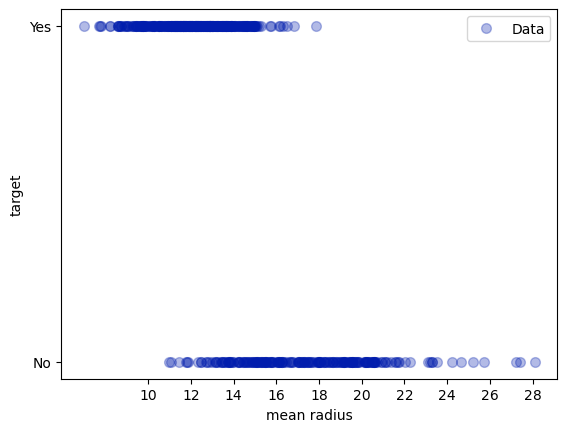

In [4]:
# Make a plot of the response (insuranceclaim) vs the predictor (age)
plt.plot(x, y, 'o', markersize=7,color="#011DAD",label="Data", alpha=0.3)

# Also add the labels for 'x' & 'y' values
plt.xlabel("mean radius")
plt.ylabel("target")

plt.xticks(np.arange(10, 30, 2.0))

# Label the value 1 as 'Yes' & 0 as 'No'
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend(loc='best')
plt.show()

In [84]:
#guesstimating the beta0 and beta1 values
beta0 = 15
beta1 = -1

In [85]:
# Use the logistic function below to predict the response based on the input
logit = []

for i in df['mean radius']:
    # Append the P(y=1) values to the logit list
    logit.append(1 / (1 + np.exp(-(beta0 + beta1 * i))))

In [86]:
# If the predictions are above a threshold of 0.5, predict as 1, else 0

y_pred = []

for py in logit:
    if py >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [87]:
# Use accuracy_score function to find the accuracy 

accuracy = accuracy_score(y, y_pred)

# Print the accuracy
print (accuracy)

0.8892794376098418


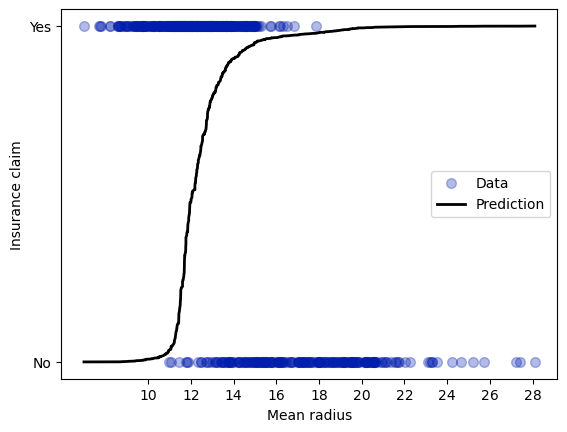

In [108]:
# Make a plot similar to the one above along with the fit curve
plt.plot(x, y, 'o', markersize=7, color="#011DAD", label="Data", alpha=0.3)

sorted_x = np.sort(x.values.ravel())
plt.plot(sorted_x, logit, linewidth=2, color='black', label="Prediction")

plt.xticks(np.arange(10, 30, 2.0))
plt.xlabel("Mean radius")
plt.ylabel("Insurance claim")
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend()
plt.show()